#3.a) Resistencia drenada de pilotes - valores fi a partir de referencias



## Librerías

In [61]:
import numpy as np
import matplotlib.pyplot as plt


##Presión efectiva vertical

In [62]:
# NZ: nivel donde queremos calcular la presión (m)
# NT: nivel del terreno (m)
# NF: nivel freático (m)
# NPS: nivel base Pampeano superior - techo Pampeano medio (m)
# Psat_PS: peso saturado Pampeano superior (kN/m3)
# Psat_PM: peso saturado Pampeano medio (kN/m3)

def f_sv_p(NZ,NF,NT,NPS,Psat_PS,Psat_PM): #función presión efectiva vertical
  Psum_PS = Psat_PS-10 #peso sumergido Pampeano superior
  Psum_PM = Psat_PM-10 #peso sumergido Pampeano medio
  z1 = NT-NPS
  z2 = NPS-NZ
  if NF>NT:
    sv_p=Psum_PS*z1+Psum_PM*z2
  elif NF<=NT and NZ>NF:
    sv_p=Psat_PS*z1+Psat_PM*z2
  elif NF<=NT and NF>=NPS:
    sv_p=Psat_PS*(NT-NF)+Psum_PS*(NF-NPS)+Psum_PM*(NPS-NZ)
  elif NF<=NT and NF<NPS:
    sv_p=Psat_PS*(NT-NPS)+Psat_PM*(NPS-NF)+Psum_PM*(NF-NZ)
  return sv_p


## Capacidad de carga por punta según Brinch Hansen

In [63]:
  # D: diámetro del pilote (m)
  # NT: nivel del terreno (m)
  # NF: nivel freático (m)
  # NP: nivel de la punta del pilote (m)
  # NPS: nivel base Pampeano superior - techo Pampeano medio (m)
  # ficv_PS: ángulo de fricción efectivo cv Pampeano superior (deg)
  # psi_PS: ángulo de dilatancia Pampeano superior (deg)
  # c_PS: cohesión efectiva Pampeano superior (kPa)
  # Psat_PS: peso saturado Pampeano superior (kN/m3)
  # ficv_PM: ángulo de fricción efectivo cv Pampeano medio (deg)
  # psi_PM: ángulo de dilatancia Pampeano medio (deg)
  # c_PM: cohesión efectiva Pampeano medio (kPa)
  # Psat_PM: peso saturado Pampeano medio (kN/m3)


def Qu_bh(D,NT,NF,NP,NPS,ficv_PS, psi_PS, c_PS,Psat_PS,ficv_PM, psi_PM, c_PM,Psat_PM):
    Ap=np.pi/4*(D**2) #area de la sección                          
    fi_PS_r = np.deg2rad(ficv_PS+psi_PS) #ángulo de fricción Pampeano superior en radianes
    fi_PM_r = np.deg2rad(ficv_PM+psi_PM) #ángulo de fricción Pampeano medio en radianes
    zp = NT-NP #longitud del pilote
    sv_p=f_sv_p(NP,NF,NT,NPS,Psat_PS,Psat_PM) #función de presión vertical con NZ=NP

    if NP>=NPS:
      Nq = np.e**(np.pi*np.tan(fi_PS_r))*np.tan(np.pi/4+(fi_PS_r)/2)**2 #fórmula Brinch-Hansen
      Nc = (Nq-1)*1/np.tan(fi_PS_r)
      dc = 1+0.4*np.arctan(zp/D)
      dq = 1+2*np.tan(fi_PS_r)*(1-np.sin(fi_PS_r))**2*np.arctan(zp/D)
      sc = 1+Nq/Nc
      sq = 1+np.tan(fi_PS_r)
      qu = c_PS*Nc*dc*sc + sv_p*Nq*sq*dq
      Qu = qu*Ap

    elif NP<NPS:
      Nq = np.e**(np.pi*np.tan(fi_PM_r))*np.tan(np.pi/4+(fi_PM_r)/2)**2 #fórmula Brinch-Hansen
      Nc = (Nq-1)*1/np.tan(fi_PM_r)
      dc = 1+0.4*np.arctan(zp/D)
      dq = 1+2*np.tan(fi_PM_r)*(1-np.sin(fi_PM_r))**2*np.arctan(zp/D)
      sc = 1+Nq/Nc
      sq = 1+np.tan(fi_PM_r)
      qu = c_PM*Nc*dc*sc + sv_p*Nq*sq*dq
      Qu = qu*Ap
 
    return Qu #Qu: resistencia última de la punta (kN)


## Capacidad de carga por punta según Vesic

In [64]:
  # D: diámetro del pilote (m)
  # NT: nivel del terreno (m)
  # NF: nivel freático (m)
  # NP: nivel de la punta del pilote (m)
  # NPS: nivel base Pampeano superior - techo Pampeano medio (m)
  # K0_PS: coeficiente de empuje en reposo Pampeano superior
  # ficv_PS: ángulo de fricción efectivo cv Pampeano superior (deg)
  # psi_PS: ángulo de dilatancia Pampeano superior (deg)
  # c_PS: cohesión efectiva Pampeano superior (kPa)
  # Psat_PS: peso saturado Pampeano superior (kN/m3)
  # E_PS: módulo de elasticidad Pampeano superior (MPa)
  # K0_PM: coeficiente de empuje en reposo Pampeano medio
  # ficv_PM: ángulo de fricción efectivo cv Pampeano medio (deg)
  # psi_PM: ángulo de dilatancia Pampeano medio (deg)
  # c_PM: cohesión efectiva Pampeano medio (kPa)
  # Psat_PM: peso saturado Pampeano medio (kN/m3)
  # E_PS: módulo de elasticidad Pampeano superior (MPa)

def Qu_vesic(D,NT,NF,NP,NPS,K0_PS,ficv_PS,psi_PS, c_PS,E_PS,Psat_PS,K0_PM,ficv_PM, psi_PM,c_PM,E_PM,Psat_PM,nu):                                
    Ap = np.pi/4*(D**2) #area de la sección
    fi_PS_r = np.deg2rad(ficv_PS+psi_PS) #ángulo de fricción Pampeano superior en radianes
    fi_PM_r = np.deg2rad(ficv_PM+psi_PM) #ángulo de fricción Pampeano medio en radianes
    zp = NT-NP #longitud del pilote
    sv_p=f_sv_p(NP,NF,NT,NPS,Psat_PS,Psat_PM) #función de presión vertical con NZ=NP
    G_PS = E_PS/(2+2*nu)
    G_PM = E_PM/(2+2*nu)

    if NP>=NPS:
      p = (1+2*K0_PS)/3*sv_p #presion media
      Ir = G_PS*1000 / (c_PS+p*np.tan(fi_PS_r))
      ev = 50*Ir**(-1.8)
      Irr = Ir / (1+ev*Ir)
      c1 = 3/(3-np.sin(fi_PS_r))*np.e**(np.pi/2-fi_PS_r)*np.tan(fi_PS_r)
      c3 = 4/3*np.sin(fi_PS_r)/(1+np.sin(fi_PS_r))
      Nsg = c1*np.tan(np.pi/4+fi_PS_r/2)**2*Irr**c3
      Nc = 1/np.tan(fi_PS_r)*((1+2*K0_PS)/3*Nsg-1)
      qu = c_PS*Nc + p*Nsg
      Qu = qu*Ap

    elif NP<NPS:
      p = (1+2*K0_PM)/3*sv_p #presion media
      Ir = G_PM*1000 / (c_PM+p*np.tan(fi_PM_r))
      ev = 50*Ir**(-1.8)
      Irr = Ir / (1+ev*Ir)
      c1 = 3/(3-np.sin(fi_PM_r))*np.e**(np.pi/2-fi_PM_r)*np.tan(fi_PM_r)
      c3 = 4/3*np.sin(fi_PM_r)/(1+np.sin(fi_PM_r))
      Nsg = c1*np.tan(np.pi/4+fi_PM_r/2)**2*Irr**c3
      Nc = 1/np.tan(fi_PM_r)*((1+2*K0_PM)/3*Nsg-1)
      qu = c_PM*Nc + p*Nsg
      Qu = qu*Ap
    return Qu



## Capacidad de carga por fuste drenado

In [65]:
  # D: diámetro del pilote (m)
  # NT: nivel del terreno (m)
  # NF: nivel freático (m)
  # NP: nivel de la punta del pilote (m)
  # NPS: nivel base Pampeano superior - techo Pampeano medio (m)
  # K0_PS: coeficiente de empuje en reposo Pampeano superior
  # ficv_PS: ángulo de fricción efectivo cv Pampeano superior (deg)
  # psi_PS: ángulo de dilatancia Pampeano superior (deg)
  # c_PS: cohesión efectiva Pampeano superior (kPa)
  # Psat_PS: peso saturado Pampeano superior (kN/m3)
  # K0_PM: coeficiente de empuje en reposo Pampeano medio
  # ficv_PM: ángulo de fricción efectivo cv Pampeano medio (deg)
  # psi_PM: ángulo de dilatancia Pampeano medio (deg)
  # c_PM: cohesión efectiva Pampeano medio (kPa)
  # Psat_PM: peso saturado Pampeano medio (kN/m3)

def Qufdr(D,NP,NT,NPS,K0_PS,ficv_PS, psi_PS, Psat_PS,K0_PM,ficv_PM, psi_PM,Psat_PM):                             
    Up = np.pi*D   #perímetro de la sección 
    fi_PS_r = np.deg2rad(ficv_PS+psi_PS) #ángulo de fricción Pampeano superior en radianes
    fi_PM_r = np.deg2rad(ficv_PM+psi_PM) #ángulo de fricción Pampeano medio en radianes
    K_PS = min(K0_PS,1)
    K_PM = min(K0_PM,1)
    delta_PS_r = 0.75*fi_PS_r #fricción interfaz hormigón-terreno (PS)
    delta_PM_r = 0.75*fi_PM_r #fricción interfaz hormigón-terreno (PM)
  
    z=np.linspace(NT,NP,num=100)#Integración de la resistencia por fuste 
    dz=z[0]-z[1] #calculo el dz
    Quf=0 #creo una variable en donde voy a ir sumando las resistencias
 
    for i in range(z.size): #barro todos los puntos del pilote
      NZ=z[i] #me fijo en que cota estoy
      sv_p=f_sv_p(NZ,NF,NT,NPS,Psat_PS,Psat_PM) #calculo la presión vertical efectiva
      if NP>=NPS:
        fs = K_PS*sv_p*np.tan(delta_PS_r) #calculo la resistencia a fricción unitaria
      elif NP<NPS:
        fs = K_PM*sv_p*np.tan(delta_PM_r) #calculo la resistencia a fricción unitaria
      Quf=Quf+fs*dz*Up #calculo la fuerza en un dz x el perímetro y lo sumo a la resistencia total

    return Quf #Quf: resistencia última por fuste (kN)

##Datos determinísticos

In [66]:
# Datos
D = 0.60        
NT = 0          
NF = -3         
NP = -12        
NPS = -8

K0_PS = 0.70
psi_PS = 2
c_PS = 10
Psat_PS= 19
E_PS = 50

K0_PM = 0.75
psi_PM = 4
c_PM = 30
Psat_PM= 19
E_PM = 120

nu = 0.25 #módulo de Poisson adoptado (Codevilla, M. y Sfriso, A., 2011. Actualización de la información geotécnica de los
          #suelos de la Ciudad de Buenos Aires)



## Datos estocásticos

In [67]:
ficv_PS_media = 31 
ficv_PS_std = 6.2 

ficv_PM_media = 32 
ficv_PM_std = 6.4

#Asumo una distribución normal de los parámetros y genero n muestras aleatorias
n=10000
ficv_PS_al=np.random.normal(ficv_PS_media, ficv_PS_std,n)
ficv_PM_al=np.random.normal(ficv_PM_media, ficv_PM_std,n)


##Distribución de ficv_PS y ficv_PM

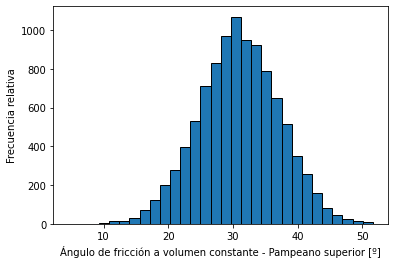

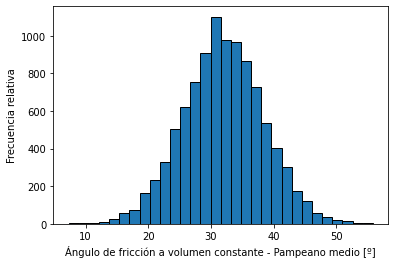

In [68]:
plt.hist(ficv_PS_al,30,edgecolor='black', linewidth=1.0)
plt.xlabel("Ángulo de fricción a volumen constante - Pampeano superior [º]")
plt.ylabel("Frecuencia relativa")
plt.show()

plt.hist(ficv_PM_al,30,edgecolor='black', linewidth=1.0)
plt.xlabel("Ángulo de fricción a volumen constante - Pampeano medio [º]")
plt.ylabel("Frecuencia relativa")

plt.show()

##Cálculo de resistencia

In [69]:
Qu_nd_al = np.zeros(n)

for i in range(n):
  ficv_PS = ficv_PS_al[i]
  ficv_PM = ficv_PM_al[i]
  Qu_p1 = Qu_bh(D,NT,NF,NP,NPS,ficv_PS, psi_PS, c_PS,Psat_PS,ficv_PM, psi_PM, c_PM,Psat_PM)# resistencia por punta (Brinch-Hansen)
  Qu_p2 = Qu_vesic(D,NT,NF,NP,NPS,K0_PS,ficv_PS,psi_PS, c_PS,E_PS,Psat_PS,K0_PM,ficv_PM, psi_PM,c_PM,E_PM,Psat_PM,nu) # resistencia por punta (Vesic)
  Qu_f=Qufdr(D,NP,NT,NPS,K0_PS,ficv_PS, psi_PS, Psat_PS,K0_PM,ficv_PM, psi_PM,Psat_PM) # Resistencia por fuste, en kN
  Qu_p=np.min([Qu_p1,Qu_p2])
  Qu_nd = Qu_p + Qu_f #resistencia drenada total, en kN
  Qu_nd_al[i] = Qu_nd

##Distribución de Qu drenada

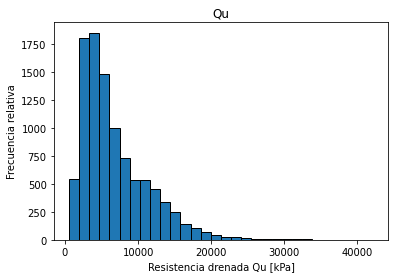

In [70]:
plt.hist(Qu_nd_al,30,edgecolor='black', linewidth=1.0)
plt.xlabel("Resistencia drenada Qu [kPa]")
plt.ylabel("Frecuencia relativa")
plt.title('Qu')

plt.show()

##Resistencia característica de confianza del 84%

In [71]:
#Ordenamos el vector con resultados
Qu_nd_al_ordenado = np.sort(Qu_nd_al)

#Calculamos que posición del vector corresponde al 16%
n5=int(np.round(n*0.16,decimals=0))

#Sacamos el valor que está en dicha posición
Quc = Qu_nd_al_ordenado[n5]


print(f'Resistencia última drenada con una confianza del 84%: {Quc:.0f} kN')

Resistencia última drenada con una confianza del 84%: 2751 kN


#3.b) Resistencia drenada de pilotes - valores fi triaxiales



## Librerías

In [72]:
import numpy as np
import matplotlib.pyplot as plt


##Presión efectiva vertical

In [73]:
# NZ: nivel donde queremos calcular la presión (m)
# NT: nivel del terreno (m)
# NF: nivel freático (m)
# NPS: nivel base Pampeano superior - techo Pampeano medio (m)
# Psat_PS: peso saturado Pampeano superior (kN/m3)
# Psat_PM: peso saturado Pampeano medio (kN/m3)

def f_sv_p(NZ,NF,NT,NPS,Psat_PS,Psat_PM): #función presión efectiva vertical
  Psum_PS = Psat_PS-10 #peso sumergido Pampeano superior
  Psum_PM = Psat_PM-10 #peso sumergido Pampeano medio
  z1 = NT-NPS
  z2 = NPS-NZ
  if NF>NT:
    sv_p=Psum_PS*z1+Psum_PM*z2
  elif NF<=NT and NZ>NF:
    sv_p=Psat_PS*z1+Psat_PM*z2
  elif NF<=NT and NF>=NPS:
    sv_p=Psat_PS*(NT-NF)+Psum_PS*(NF-NPS)+Psum_PM*(NPS-NZ)
  elif NF<=NT and NF<NPS:
    sv_p=Psat_PS*(NT-NPS)+Psat_PM*(NPS-NF)+Psum_PM*(NF-NZ)
  return sv_p


## Capacidad de carga por punta según Brinch Hansen

In [74]:
  # D: diámetro del pilote (m)
  # NT: nivel del terreno (m)
  # NF: nivel freático (m)
  # NP: nivel de la punta del pilote (m)
  # NPS: nivel base Pampeano superior - techo Pampeano medio (m)
  # ficv_PS: ángulo de fricción efectivo cv Pampeano superior (deg)
  # psi_PS: ángulo de dilatancia Pampeano superior (deg)
  # c_PS: cohesión efectiva Pampeano superior (kPa)
  # Psat_PS: peso saturado Pampeano superior (kN/m3)
  # ficv_PM: ángulo de fricción efectivo cv Pampeano medio (deg)
  # psi_PM: ángulo de dilatancia Pampeano medio (deg)
  # c_PM: cohesión efectiva Pampeano medio (kPa)
  # Psat_PM: peso saturado Pampeano medio (kN/m3)


def Qu_bh(D,NT,NF,NP,NPS,ficv_PS, psi_PS, c_PS,Psat_PS,ficv_PM, psi_PM, c_PM,Psat_PM):
    Ap=np.pi/4*(D**2) #area de la sección                          
    fi_PS_r = np.deg2rad(ficv_PS+psi_PS) #ángulo de fricción Pampeano superior en radianes
    fi_PM_r = np.deg2rad(ficv_PM+psi_PM) #ángulo de fricción Pampeano medio en radianes
    zp = NT-NP #longitud del pilote
    sv_p=f_sv_p(NP,NF,NT,NPS,Psat_PS,Psat_PM) #función de presión vertical con NZ=NP

    if NP>=NPS:
      Nq = np.e**(np.pi*np.tan(fi_PS_r))*np.tan(np.pi/4+(fi_PS_r)/2)**2 #fórmula Brinch-Hansen
      Nc = (Nq-1)*1/np.tan(fi_PS_r)
      dc = 1+0.4*np.arctan(zp/D)
      dq = 1+2*np.tan(fi_PS_r)*(1-np.sin(fi_PS_r))**2*np.arctan(zp/D)
      sc = 1+Nq/Nc
      sq = 1+np.tan(fi_PS_r)
      qu = c_PS*Nc*dc*sc + sv_p*Nq*sq*dq
      Qu = qu*Ap

    elif NP<NPS:
      Nq = np.e**(np.pi*np.tan(fi_PM_r))*np.tan(np.pi/4+(fi_PM_r)/2)**2 #fórmula Brinch-Hansen
      Nc = (Nq-1)*1/np.tan(fi_PM_r)
      dc = 1+0.4*np.arctan(zp/D)
      dq = 1+2*np.tan(fi_PM_r)*(1-np.sin(fi_PM_r))**2*np.arctan(zp/D)
      sc = 1+Nq/Nc
      sq = 1+np.tan(fi_PM_r)
      qu = c_PM*Nc*dc*sc + sv_p*Nq*sq*dq
      Qu = qu*Ap
 
    return Qu #Qu: resistencia última de la punta (kN)


## Capacidad de carga por punta según Vesic

In [75]:
  # D: diámetro del pilote (m)
  # NT: nivel del terreno (m)
  # NF: nivel freático (m)
  # NP: nivel de la punta del pilote (m)
  # NPS: nivel base Pampeano superior - techo Pampeano medio (m)
  # K0_PS: coeficiente de empuje en reposo Pampeano superior
  # ficv_PS: ángulo de fricción efectivo cv Pampeano superior (deg)
  # psi_PS: ángulo de dilatancia Pampeano superior (deg)
  # c_PS: cohesión efectiva Pampeano superior (kPa)
  # Psat_PS: peso saturado Pampeano superior (kN/m3)
  # E_PS: módulo de elasticidad Pampeano superior (MPa)
  # K0_PM: coeficiente de empuje en reposo Pampeano medio
  # ficv_PM: ángulo de fricción efectivo cv Pampeano medio (deg)
  # psi_PM: ángulo de dilatancia Pampeano medio (deg)
  # c_PM: cohesión efectiva Pampeano medio (kPa)
  # Psat_PM: peso saturado Pampeano medio (kN/m3)
  # E_PS: módulo de elasticidad Pampeano superior (MPa)

def Qu_vesic(D,NT,NF,NP,NPS,K0_PS,ficv_PS,psi_PS, c_PS,E_PS,Psat_PS,K0_PM,ficv_PM, psi_PM,c_PM,E_PM,Psat_PM,nu):                                
    Ap = np.pi/4*(D**2) #area de la sección
    fi_PS_r = np.deg2rad(ficv_PS+psi_PS) #ángulo de fricción Pampeano superior en radianes
    fi_PM_r = np.deg2rad(ficv_PM+psi_PM) #ángulo de fricción Pampeano medio en radianes
    zp = NT-NP #longitud del pilote
    sv_p=f_sv_p(NP,NF,NT,NPS,Psat_PS,Psat_PM) #función de presión vertical con NZ=NP
    G_PS = E_PS/(2+2*nu)
    G_PM = E_PM/(2+2*nu)

    if NP>=NPS:
      p = (1+2*K0_PS)/3*sv_p #presion media
      Ir = G_PS*1000 / (c_PS+p*np.tan(fi_PS_r))
      ev = 50*Ir**(-1.8)
      Irr = Ir / (1+ev*Ir)
      c1 = 3/(3-np.sin(fi_PS_r))*np.e**(np.pi/2-fi_PS_r)*np.tan(fi_PS_r)
      c3 = 4/3*np.sin(fi_PS_r)/(1+np.sin(fi_PS_r))
      Nsg = c1*np.tan(np.pi/4+fi_PS_r/2)**2*Irr**c3
      Nc = 1/np.tan(fi_PS_r)*((1+2*K0_PS)/3*Nsg-1)
      qu = c_PS*Nc + p*Nsg
      Qu = qu*Ap

    elif NP<NPS:
      p = (1+2*K0_PM)/3*sv_p #presion media
      Ir = G_PM*1000 / (c_PM+p*np.tan(fi_PM_r))
      ev = 50*Ir**(-1.8)
      Irr = Ir / (1+ev*Ir)
      c1 = 3/(3-np.sin(fi_PM_r))*np.e**(np.pi/2-fi_PM_r)*np.tan(fi_PM_r)
      c3 = 4/3*np.sin(fi_PM_r)/(1+np.sin(fi_PM_r))
      Nsg = c1*np.tan(np.pi/4+fi_PM_r/2)**2*Irr**c3
      Nc = 1/np.tan(fi_PM_r)*((1+2*K0_PM)/3*Nsg-1)
      qu = c_PM*Nc + p*Nsg
      Qu = qu*Ap
    return Qu



## Capacidad de carga por fuste drenado

In [76]:
  # D: diámetro del pilote (m)
  # NT: nivel del terreno (m)
  # NF: nivel freático (m)
  # NP: nivel de la punta del pilote (m)
  # NPS: nivel base Pampeano superior - techo Pampeano medio (m)
  # K0_PS: coeficiente de empuje en reposo Pampeano superior
  # ficv_PS: ángulo de fricción efectivo cv Pampeano superior (deg)
  # psi_PS: ángulo de dilatancia Pampeano superior (deg)
  # c_PS: cohesión efectiva Pampeano superior (kPa)
  # Psat_PS: peso saturado Pampeano superior (kN/m3)
  # K0_PM: coeficiente de empuje en reposo Pampeano medio
  # ficv_PM: ángulo de fricción efectivo cv Pampeano medio (deg)
  # psi_PM: ángulo de dilatancia Pampeano medio (deg)
  # c_PM: cohesión efectiva Pampeano medio (kPa)
  # Psat_PM: peso saturado Pampeano medio (kN/m3)

def Qufdr(D,NP,NT,NPS,K0_PS,ficv_PS, psi_PS, Psat_PS,K0_PM,ficv_PM, psi_PM,Psat_PM):                             
    Up = np.pi*D   #perímetro de la sección 
    fi_PS_r = np.deg2rad(ficv_PS+psi_PS) #ángulo de fricción Pampeano superior en radianes
    fi_PM_r = np.deg2rad(ficv_PM+psi_PM) #ángulo de fricción Pampeano medio en radianes
    K_PS = min(K0_PS,1)
    K_PM = min(K0_PM,1)
    delta_PS_r = 0.75*fi_PS_r #fricción interfaz hormigón-terreno (PS)
    delta_PM_r = 0.75*fi_PM_r #fricción interfaz hormigón-terreno (PM)
  
    z=np.linspace(NT,NP,num=100)#Integración de la resistencia por fuste 
    dz=z[0]-z[1] #calculo el dz
    Quf=0 #creo una variable en donde voy a ir sumando las resistencias
 
    for i in range(z.size): #barro todos los puntos del pilote
      NZ=z[i] #me fijo en que cota estoy
      sv_p=f_sv_p(NZ,NF,NT,NPS,Psat_PS,Psat_PM) #calculo la presión vertical efectiva
      if NP>=NPS:
        fs = K_PS*sv_p*np.tan(delta_PS_r) #calculo la resistencia a fricción unitaria
      elif NP<NPS:
        fs = K_PM*sv_p*np.tan(delta_PM_r) #calculo la resistencia a fricción unitaria
      Quf=Quf+fs*dz*Up #calculo la fuerza en un dz x el perímetro y lo sumo a la resistencia total

    return Quf #Quf: resistencia última por fuste (kN)

##Datos determinísticos

In [77]:
# Datos
D = 0.60        
NT = 0          
NF = -3         
NP = -12        
NPS = -8

K0_PS = 0.70
psi_PS = 2
c_PS = 10
Psat_PS= 19
E_PS = 50

K0_PM = 0.75
psi_PM = 4
c_PM = 30
Psat_PM= 19
E_PM = 120

nu = 0.25 #módulo de Poisson adoptado (Codevilla, M. y Sfriso, A., 2011. Actualización de la información geotécnica de los
          #suelos de la Ciudad de Buenos Aires)



## Datos estocásticos

In [78]:
ficv_PS_media = 30 
ficv_PS_std = 1.5 

ficv_PM_media = 33 
ficv_PM_std = 1.65

#Asumo una distribución normal de los parámetros y genero n muestras aleatorias
n=10000
ficv_PS_al=np.random.normal(ficv_PS_media, ficv_PS_std,n)
ficv_PM_al=np.random.normal(ficv_PM_media, ficv_PM_std,n)


##Distribución de ficv_PS y ficv_PM

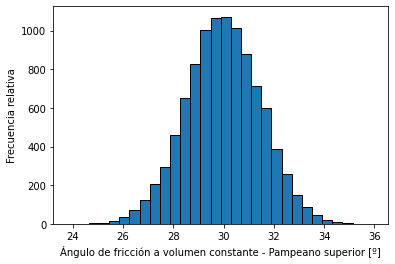

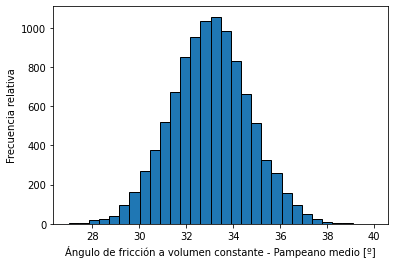

In [79]:
plt.hist(ficv_PS_al,30,edgecolor='black', linewidth=1.0)
plt.xlabel("Ángulo de fricción a volumen constante - Pampeano superior [º]")
plt.ylabel("Frecuencia relativa")
plt.show()

plt.hist(ficv_PM_al,30,edgecolor='black', linewidth=1.0)
plt.xlabel("Ángulo de fricción a volumen constante - Pampeano medio [º]")
plt.ylabel("Frecuencia relativa")

plt.show()

##Cálculo de resistencia

In [80]:
Qu_nd_al = np.zeros(n)

for i in range(n):
  ficv_PS = ficv_PS_al[i]
  ficv_PM = ficv_PM_al[i]
  Qu_p1 = Qu_bh(D,NT,NF,NP,NPS,ficv_PS, psi_PS, c_PS,Psat_PS,ficv_PM, psi_PM, c_PM,Psat_PM)# resistencia por punta (Brinch-Hansen)
  Qu_p2 = Qu_vesic(D,NT,NF,NP,NPS,K0_PS,ficv_PS,psi_PS, c_PS,E_PS,Psat_PS,K0_PM,ficv_PM, psi_PM,c_PM,E_PM,Psat_PM,nu) # resistencia por punta (Vesic)
  Qu_f=Qufdr(D,NP,NT,NPS,K0_PS,ficv_PS, psi_PS, Psat_PS,K0_PM,ficv_PM, psi_PM,Psat_PM) # Resistencia por fuste, en kN
  Qu_p=np.min([Qu_p1,Qu_p2])
  Qu_nd = Qu_p + Qu_f #resistencia drenada total, en kN
  Qu_nd_al[i] = Qu_nd

##Distribución de Qu drenada

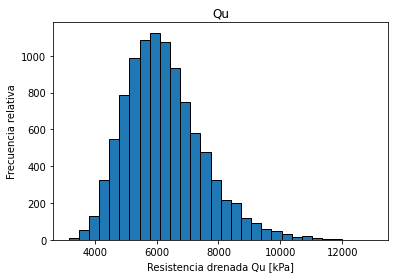

In [81]:
plt.hist(Qu_nd_al,30,edgecolor='black', linewidth=1.0)
plt.xlabel("Resistencia drenada Qu [kPa]")
plt.ylabel("Frecuencia relativa")
plt.title('Qu')

plt.show()

##Resistencia característica de confianza del 84%

In [82]:
#Ordenamos el vector con resultados
Qu_nd_al_ordenado = np.sort(Qu_nd_al)

#Calculamos que posición del vector corresponde al 16%
n5=int(np.round(n*0.16,decimals=0))

#Sacamos el valor que está en dicha posición
Quc = Qu_nd_al_ordenado[n5]


print(f'Resistencia última drenada con una confianza del 84%: {Quc:.0f} kN')

Resistencia última drenada con una confianza del 84%: 5026 kN
